<a href="https://colab.research.google.com/github/mahshadmoradi/Machine-Learning/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mahshad Moradi

**Student ID**: 400109373



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
## Import necessary libraries here ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
## Write your code here ##

# Load the dataset
boston_df = pd.read_csv('Boston.csv')

# Display the first few rows of the dataset
print(boston_df.head())

# Print the shape of the dataset
print("\n Dataset shape:", boston_df.shape, "\n")

# Describe the dataset to understand its features
print(boston_df.describe())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

 Dataset shape: (506, 14) 

             CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min 

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:
## Write your code here ##

# Define the features and the target
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calculate and print R^2 and RMSE for both sets
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Print the coefficients
print("\nCoefficients:", lin_reg.coef_)

Training R^2: 0.7508856358979673
Test R^2: 0.668759493535636
Training RMSE: 4.6520331848801675
Test RMSE: 4.9286021826653075

Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

In [ ]:
## Write your code here ##

# Define alphas
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Lists to store results
train_errors = []
test_errors = []
coefficients = []

# Standardize features
for alpha in alphas:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))

    # Fit the model
    ridge.fit(X_train, y_train)

    # Predict and calculate errors
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients
    coefficients.append(ridge.named_steps['ridge'].coef_)

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

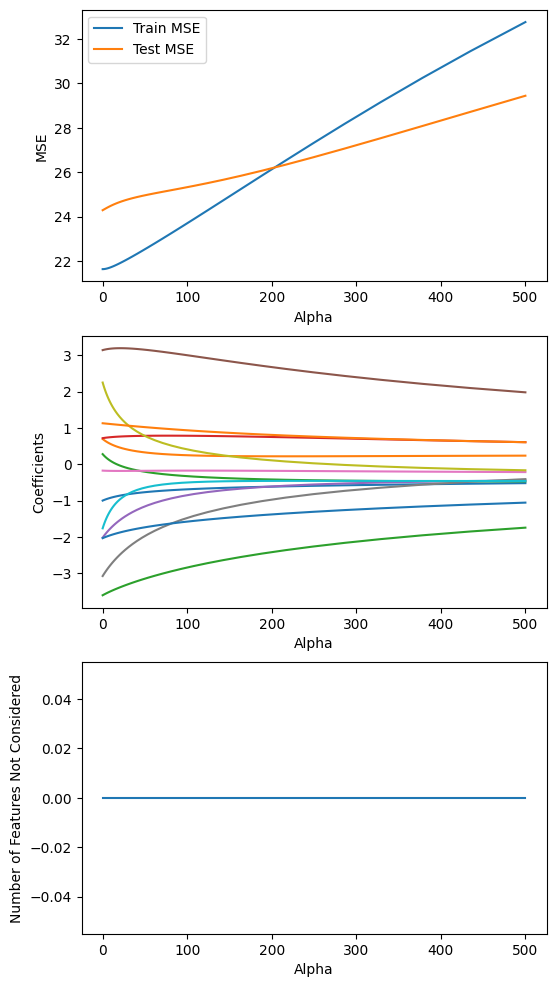


Optimal Alpha: 0.0005
Test MSE with Optimal Alpha: 24.29113034535464
Test R^2 with Optimal Alpha: 0.6687593453040714


In [ ]:
## Write your code here ##

# Plotting the results
# MSE vs. alpha
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)
plt.plot(alphas, train_errors, label='Train MSE')
plt.plot(alphas, test_errors, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()

# Coefficients vs. alpha
plt.subplot(3, 1, 2)
coefficients = np.array(coefficients)
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')

# Number of not-considered features vs. alpha
plt.subplot(3, 1, 3)
not_considered = np.sum(coefficients == 0, axis=1)
plt.plot(alphas, not_considered)
plt.xlabel('Alpha')
plt.ylabel('Number of Features Not Considered')
plt.show()

# Selecting the optimal alpha (You might use cross-validation for this)
# Here we select alpha with the lowest test MSE for demonstration
optimal_alpha = alphas[np.argmin(test_errors)]
print("\nOptimal Alpha:", optimal_alpha)

# Fit and evaluate a Ridge model with the optimal alpha
ridge_optimal = make_pipeline(StandardScaler(), Ridge(alpha=optimal_alpha))
ridge_optimal.fit(X_train, y_train)
y_test_pred = ridge_optimal.predict(X_test)
print("Test MSE with Optimal Alpha:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 with Optimal Alpha:", r2_score(y_test, y_test_pred))

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

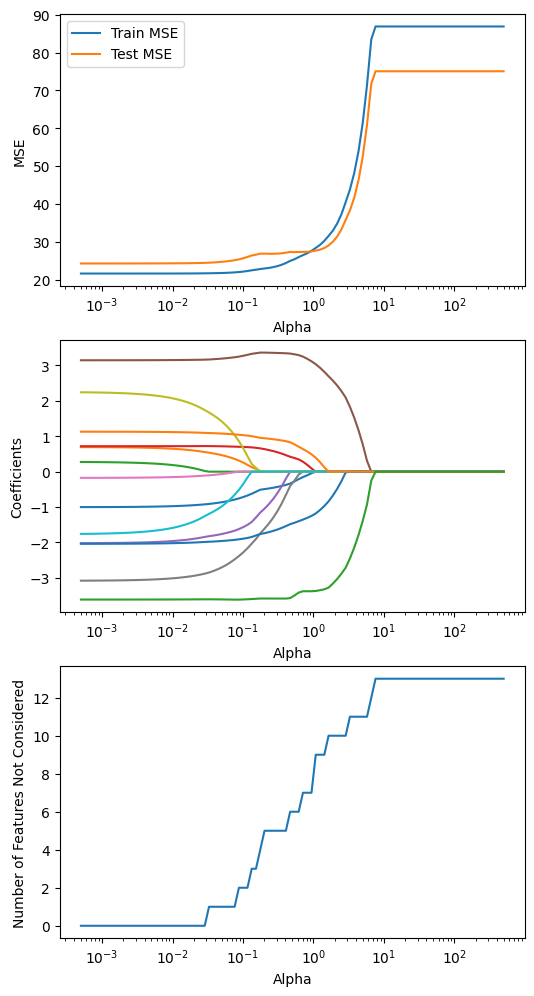


Optimal Alpha: 0.0005
Test MSE with Optimal Alpha: 24.292826227977404
Test R^2 with Optimal Alpha: 0.6687362197737949


In [ ]:
# Define alphas
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Lists to store results
train_errors = []
test_errors = []
coefficients = []

# Standardize features
for alpha in alphas:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha))

    # Fit the model
    lasso.fit(X_train, y_train)

    # Predict and calculate errors
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients
    coefficients.append(lasso.named_steps['lasso'].coef_)

# Plotting the results
# MSE vs. alpha
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)
plt.plot(alphas, train_errors, label='Train MSE')
plt.plot(alphas, test_errors, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()

# Coefficients vs. alpha
plt.subplot(3, 1, 2)
coefficients = np.array(coefficients)
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')

# Number of not-considered features vs. alpha
plt.subplot(3, 1, 3)
not_considered = np.sum(coefficients == 0, axis=1)
plt.plot(alphas, not_considered)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Features Not Considered')
plt.show()

# Selecting the optimal alpha (You might use cross-validation for this)
# Here we select alpha with the lowest test MSE for demonstration
optimal_alpha = alphas[np.argmin(test_errors)]
print("\nOptimal Alpha:", optimal_alpha)

# Fit and evaluate a Lasso model with the optimal alpha
lasso_optimal = make_pipeline(StandardScaler(), Lasso(alpha=optimal_alpha))
lasso_optimal.fit(X_train, y_train)
y_test_pred = lasso_optimal.predict(X_test)
print("Test MSE with Optimal Alpha:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 with Optimal Alpha:", r2_score(y_test, y_test_pred))


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

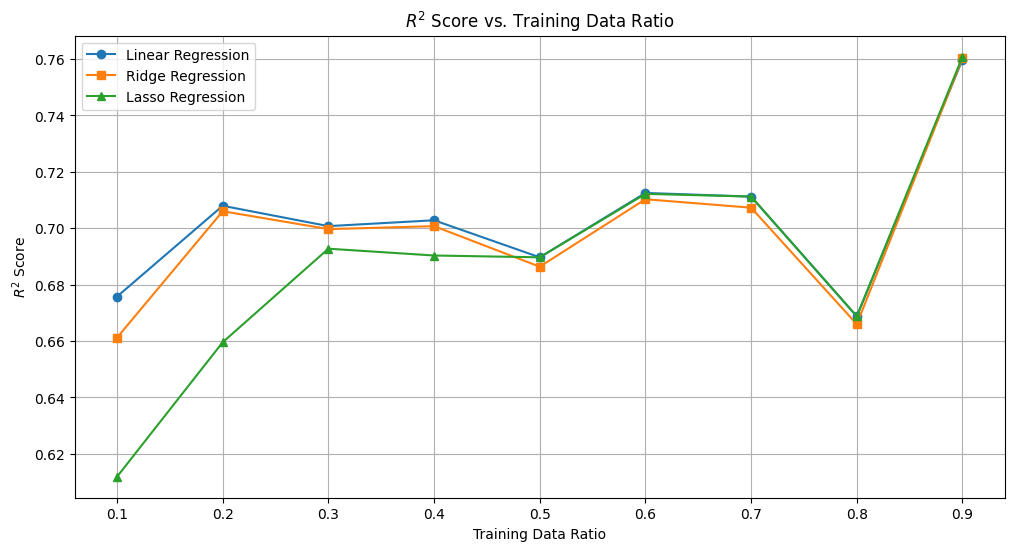

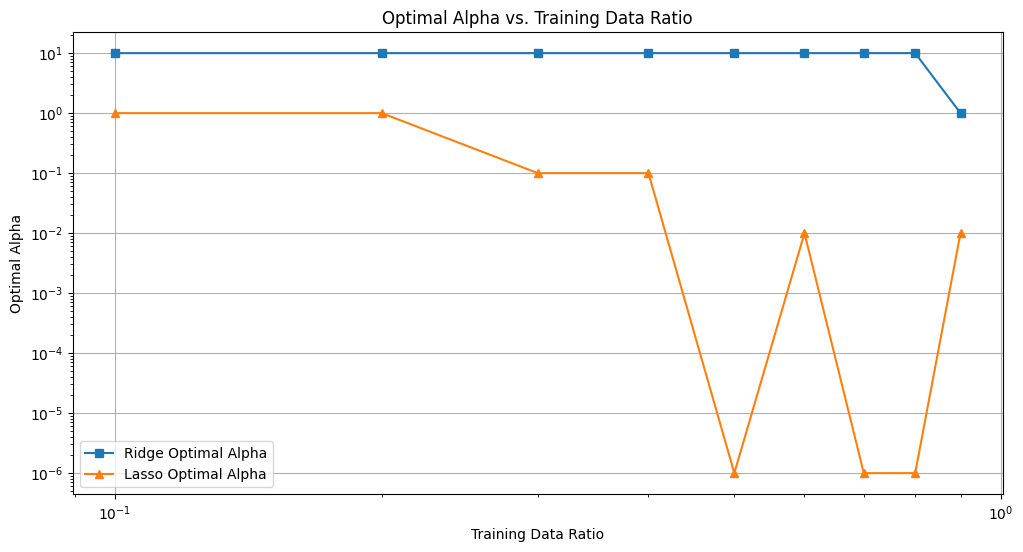

In [ ]:
## Write you code here ##

# Ratios of training data to be used
training_ratios = np.linspace(0.1, 0.9, 9)

# Storing results
r2_scores_lr = []
r2_scores_ridge = []
r2_scores_lasso = []
optimal_alphas_ridge = []
optimal_alphas_lasso = []

for ratio in training_ratios:
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)

    # Linear Regression
    lr = LinearRegression().fit(X_train, y_train)
    r2_scores_lr.append(r2_score(y_test, lr.predict(X_test)))

    # Ridge Regression with cross-validation for alpha
    ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-6, 6, 13))).fit(X_train, y_train)
    r2_scores_ridge.append(r2_score(y_test, ridge.predict(X_test)))
    optimal_alphas_ridge.append(ridge.named_steps['ridgecv'].alpha_)

    # Lasso Regression with cross-validation for alpha
    lasso = make_pipeline(StandardScaler(), LassoCV(alphas=np.logspace(-6, 6, 13), max_iter=10000)).fit(X_train, y_train)
    r2_scores_lasso.append(r2_score(y_test, lasso.predict(X_test)))
    optimal_alphas_lasso.append(lasso.named_steps['lassocv'].alpha_)

# Plotting R^2 for test data versus ratio of training data
plt.figure(figsize=(12, 6))
plt.plot(training_ratios, r2_scores_lr, label='Linear Regression', marker='o')
plt.plot(training_ratios, r2_scores_ridge, label='Ridge Regression', marker='s')
plt.plot(training_ratios, r2_scores_lasso, label='Lasso Regression', marker='^')
plt.xlabel('Training Data Ratio')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Score vs. Training Data Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Plotting selected alpha value versus training data ratio for ridge and lasso
plt.figure(figsize=(12, 6))
plt.plot(training_ratios, optimal_alphas_ridge, label='Ridge Optimal Alpha', marker='s')
plt.plot(training_ratios, optimal_alphas_lasso, label='Lasso Optimal Alpha', marker='^')
plt.xlabel('Training Data Ratio')
plt.ylabel('Optimal Alpha')
plt.title('Optimal Alpha vs. Training Data Ratio')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()